In [41]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [42]:
df = pd.read_csv('datasets/cluster_validation_data.txt', sep=",", header=None)
df.head()

,0,1
0,2.510076,2.159303
1,3.739776,0.974175
2,-0.142930,2.960866
3,2.817929,2.268013
4,2.302407,2.119619


In [43]:
# normalize data
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [44]:
def kmeans(X,k=3,max_iterations=100):
    '''
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established
    
    Steps:
    1. Convert data to numpy aray
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change
    
    Return:
    np.array: containg class of each data point
    '''
    if isinstance(X, pd.DataFrame):X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P==i,:].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'),axis=1)
        if np.array_equal(P,tmp):break
        P = tmp
    return P

In [45]:
P = kmeans(X)

In [46]:
assert len(df) == len(P)

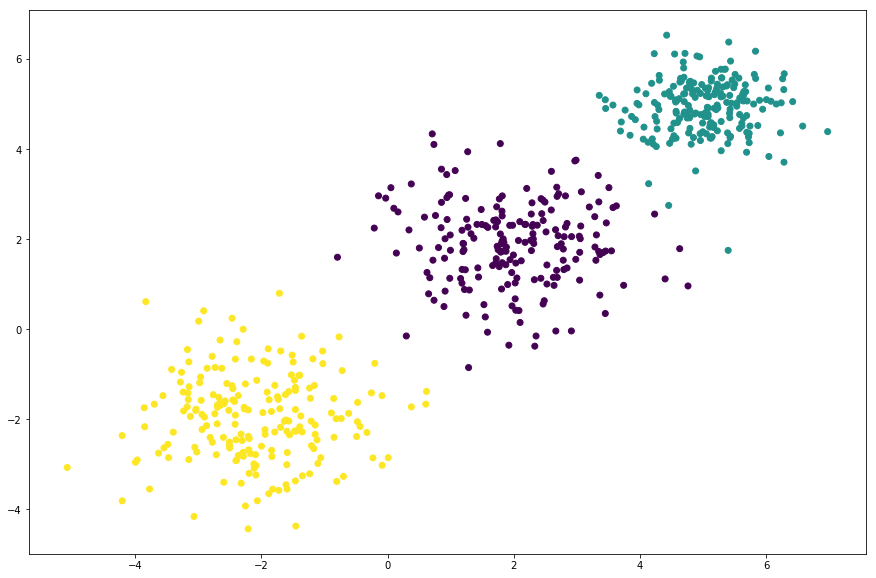

In [47]:
# denormalize data
X = sc.inverse_transform(X)
plt.figure(figsize=(15,10))
plt.scatter(X[:,0],X[:,1],c=P)
plt.show()